# Working with Web Experiences in the Python API

As of version 2.2.0 of the ArcGIS API for Python, users can now work directly with [Experience Builder](https://www.esri.com/en-us/arcgis/products/arcgis-experience-builder/overview) items, enabling some very helpful content management workflows. In this notebook, we'll give an overview of the class and its properties before diving into some handy usage examples.

## Class Basics

First let's examine a screenshot of the `Web Experience` class help from the API reference:

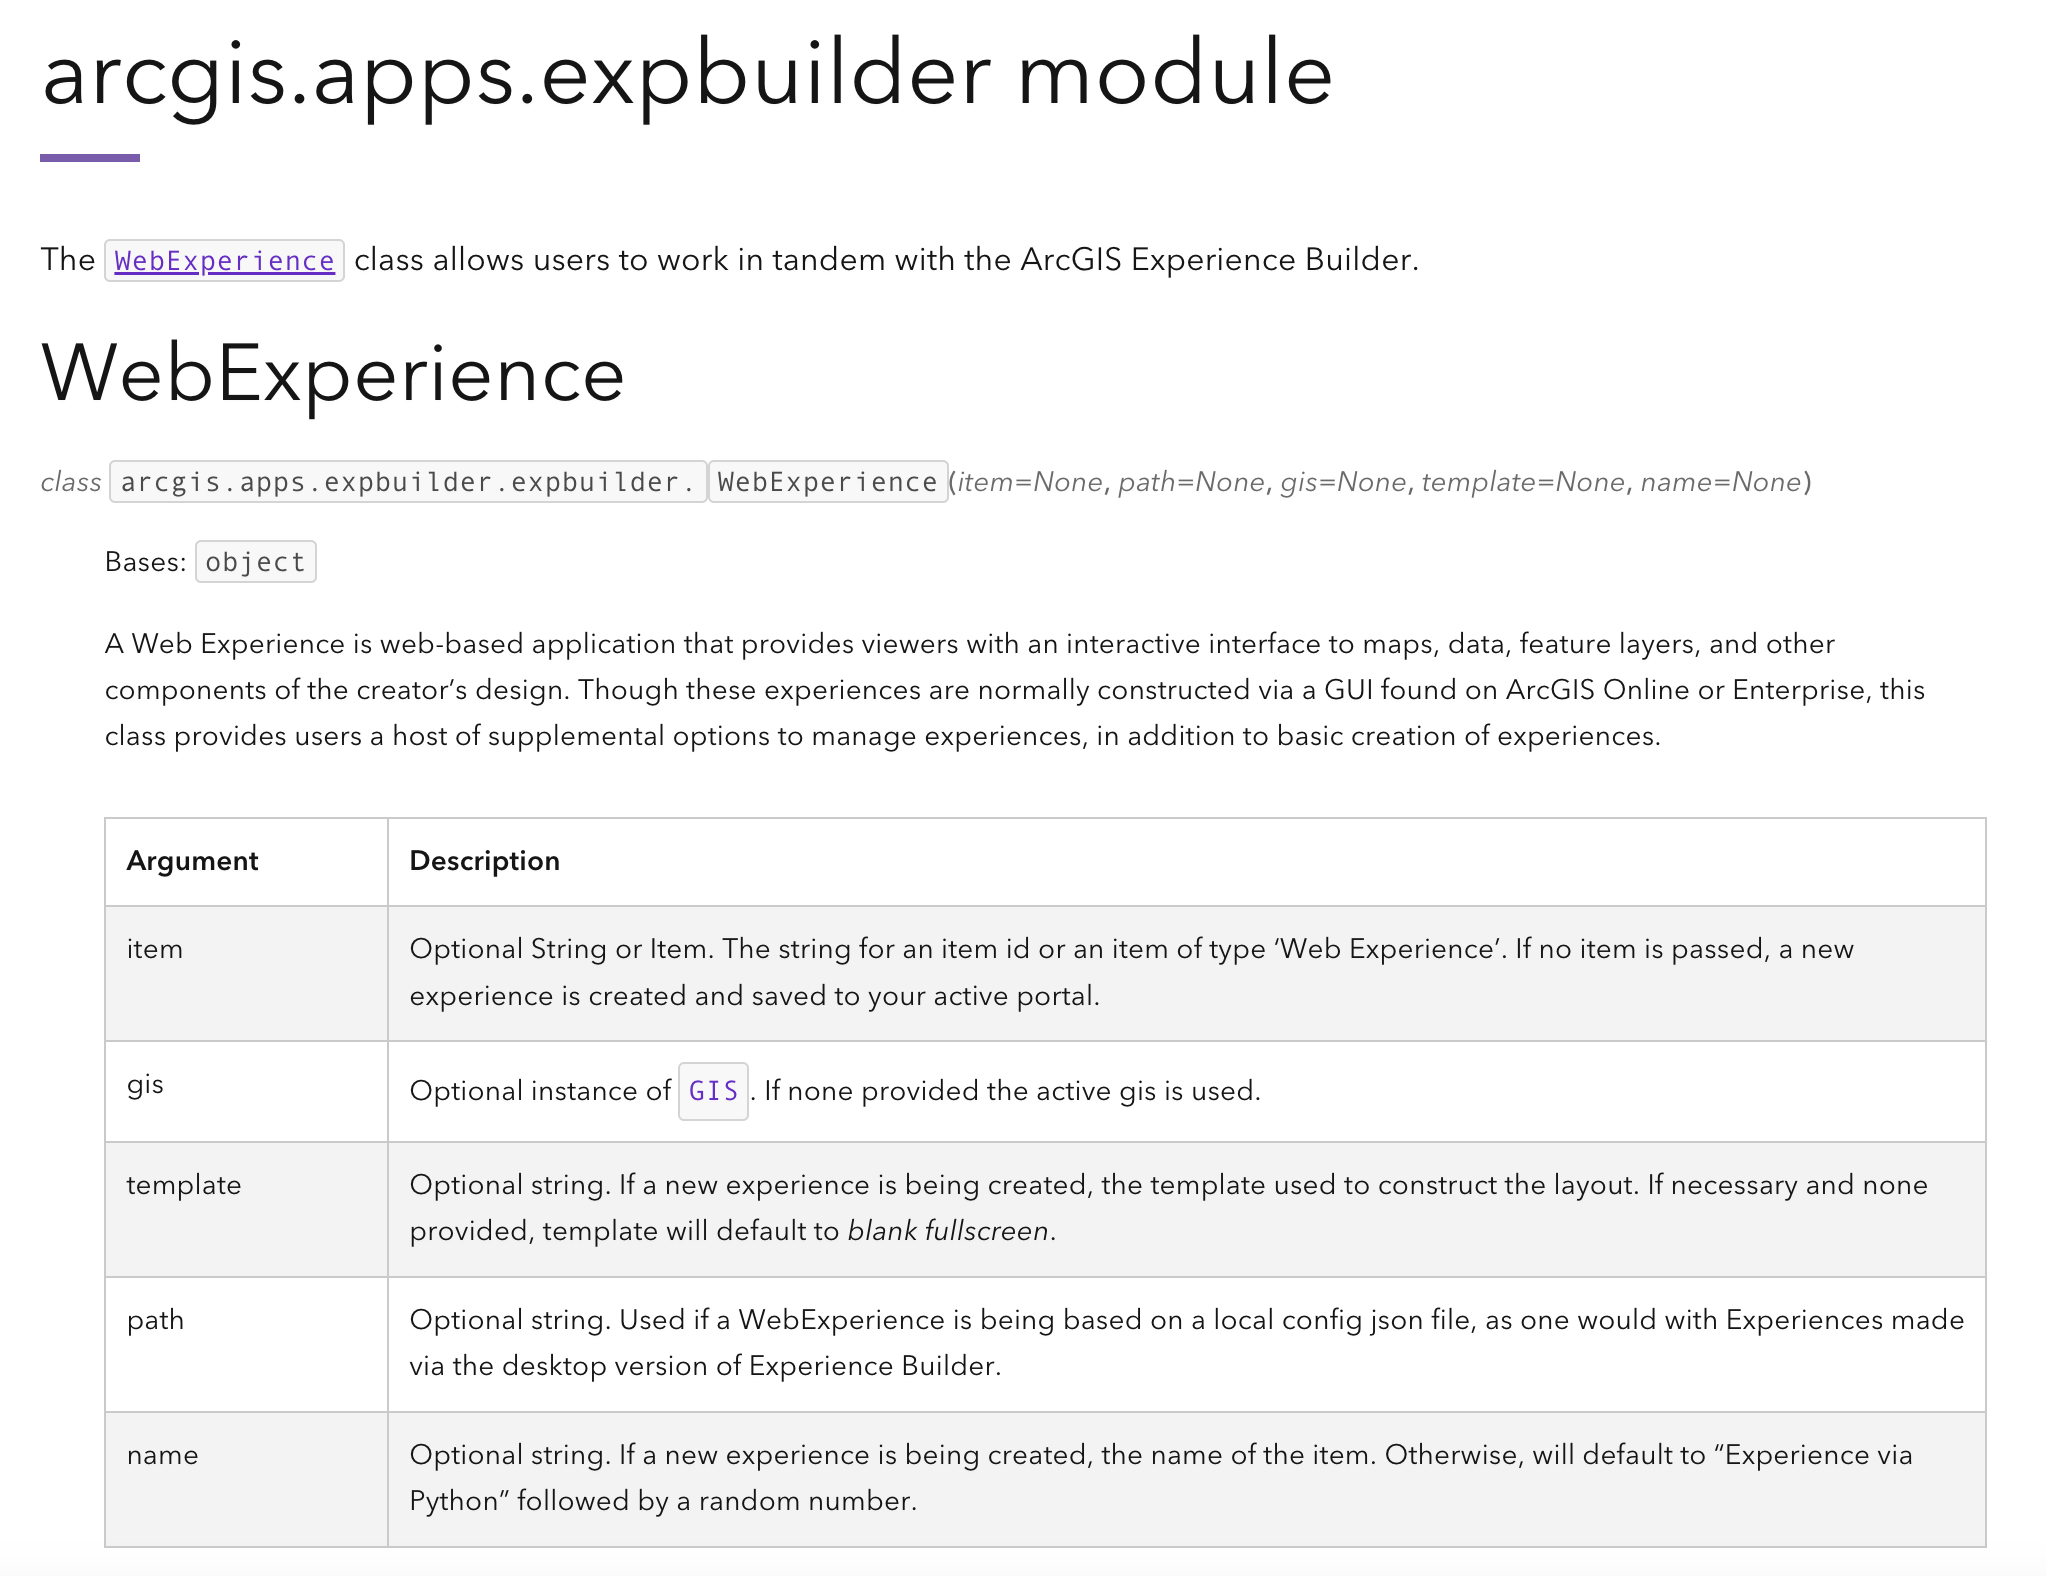 </img> 

Instantiating the class is easy! 
- To work with an existing experience from a portal, simply pass in an experience `item`, or pass in the item ID of an experience from the specified or active GIS. 
- To work with a local experience made from the Desktop Experience Builder, pass in the path to the downloaded config.json file. 
- To make a new experience, just instantiate the class without passing in an item or path- when doing this, you can dictate the template and the name of the new experience.

All of these will be displayed in this notebook. We're going to start basic and create our own new experience.

In [2]:
# import the module from the apps folder, and establish a GIS connection.
from arcgis.apps.expbuilder import WebExperience
from arcgis.gis import GIS
gis = GIS(profile="your_online_profile")

Now, we'll make an experience and observe the portal item. When making a new experience, there are 3 optional parameters to consider: `template`, `gis`, and `name`. 

- `template` can be the string name of a template, or an item from the Templates enum class (see below for example). Note that certain templates may have been added to the Experience Builder GUI in between Python API releases, so they may not yet be available until the next API update. Defaults to the "Blank Fullscreen" template.

- `gis` is the GIS object corresponding to the desired portal. Defaults to the currently active GIS in the environment.

- `name` is the name of the portal item. Defaults to a randomly-generated name that specifies it originated from the Python API.

In [ ]:
# template enum class example
from arcgis.apps.expbuilder import Templates
temp1 = Templates.MONITOR

# if using a notebook, can preview the template by calling preview()
temp1.preview()

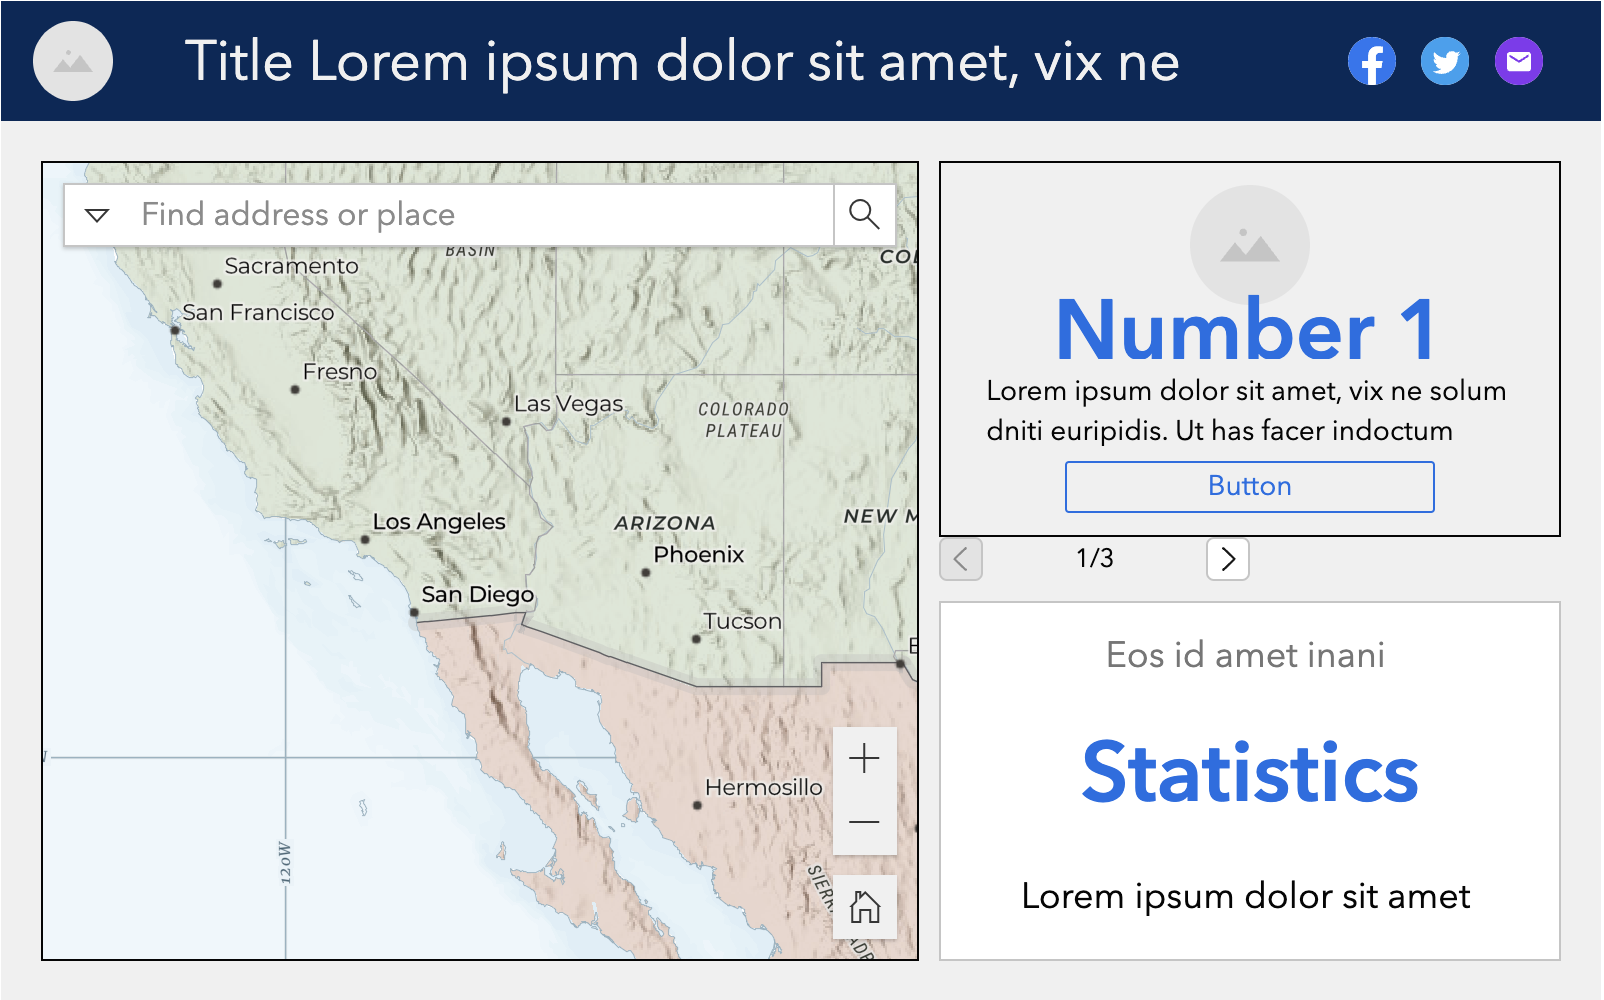 </img> 

In [3]:
# now, we'll create a new blank experience
new_exp = WebExperience(template = "foldable", name = "Neat Little Experience")
new_exp.item

<Item title:"Neat Little Experience" type:Web Experience owner:online_user>

In addition to the `item` property, WebExperiences also have two other public facing properties- `itemid` and `datasources`.

In [4]:
new_exp.itemid

'27de6c2247a74fa99b9e52e0610b937f'

In [5]:
new_exp.datasources

{}

Currently, we haven't added any data to this experience, so it shows up as empty. We'll go ahead and delete this experience, and instead show working with an existing experience.

In [6]:
new_exp.delete()

True

Now, we'll grab an existing Experience that's still a draft, use `preview()` to see how it looks, and then use the `save()` method to publish it before using it in the next part of our notebook.

Note that `preview()` and `view()` return iFrames, which are viewable in Jupyter Notebooks upon call. Screenshots of the output have been placed in this notebook for reproduction purposes.

In [ ]:
# first, we'll grab an experience from our source portal, and use preview() to see it
portal_exp = WebExperience("db78e69e056e47b186b55ebd3ba46de2", gis = gis)
portal_exp.preview()

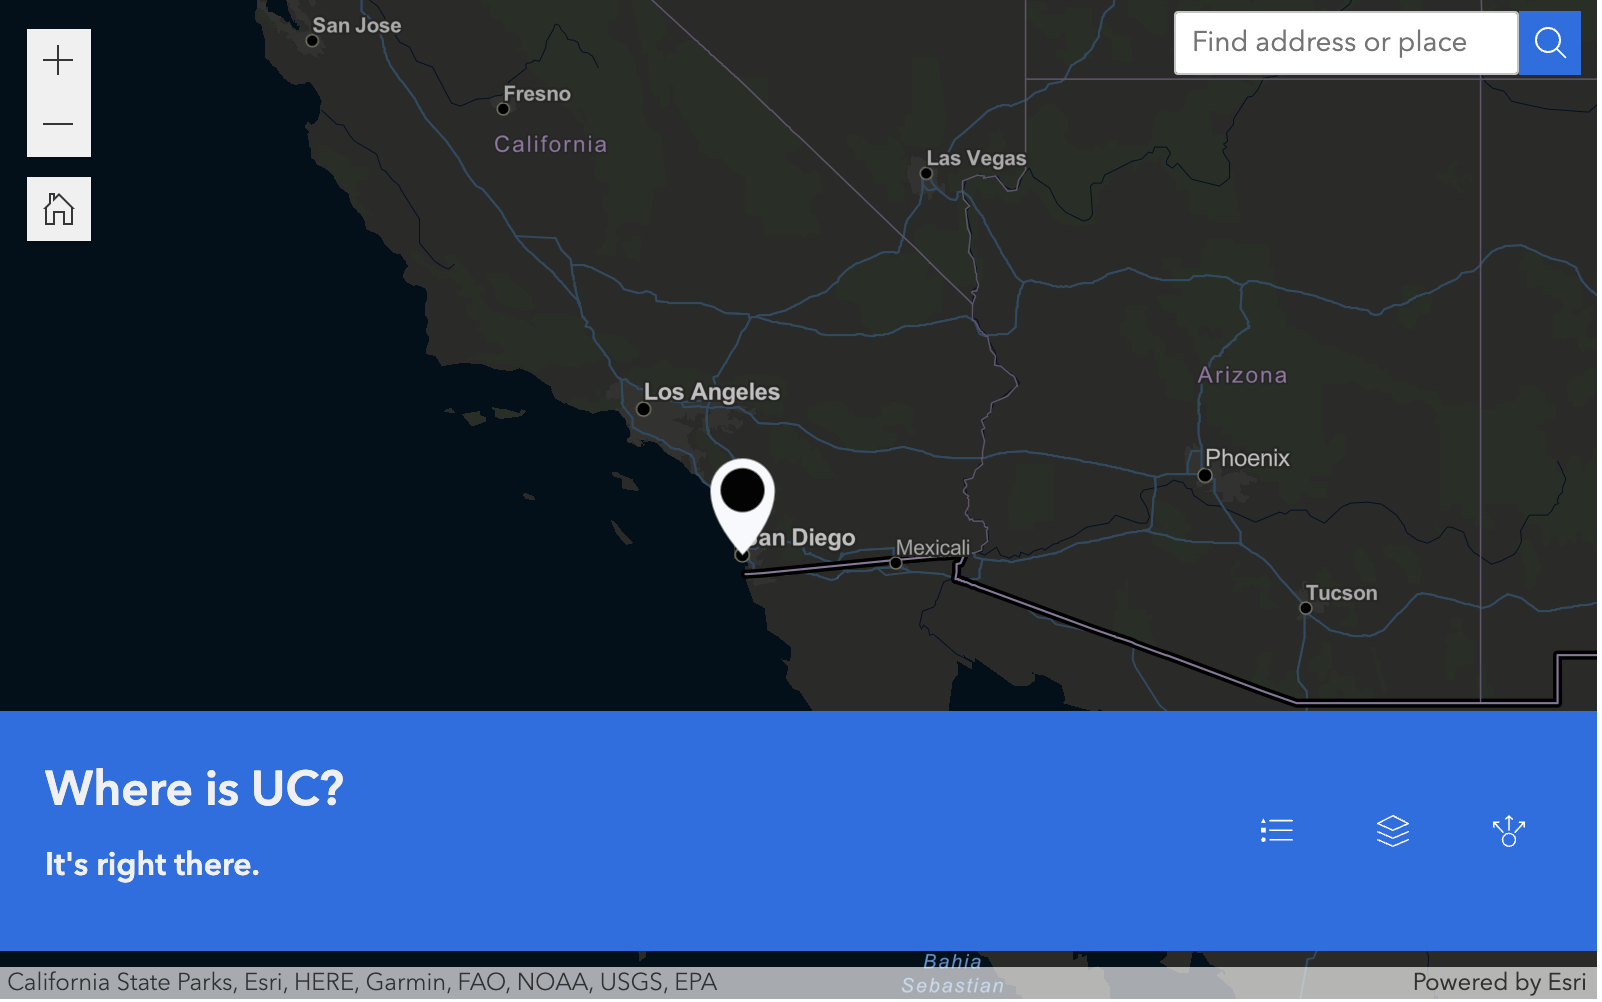 </img> 

In [9]:
portal_exp.save(publish = True)

True

For users super savvy about the structure about the structure of Experiences, they can use the `WebExperience._draft` hidden property to edit the structure and save changes directly through the Python API. There will be more options for these methods in future releases.

## Cloning an Experience and Validating its Success

Among other changes, 2.2.0 brings in the ability to clone experiences. This can be done both through `gis.content.clone_items()` or through the WebExperience class. We'll show here the helpful extra tools the class has to aid in this workflow.

Clearly, our experience from above has another item within it- a feature layer containing a data point. Dependent data items can sometimes be a  thorn in the side for any GIS admin that wants to clone or move items around- luckily, the aforementioned `datasources` property lets users quickly see what those items are and edit them if need be. 

An important note is that editing this property will change the structure of the Experience itself- so if you want a different data source showing up in place of one, you can change it directly through its dictionary there. This is a handy capability when moving Experiences from one portal to another where identical datasources might have different ID's & portalUrl's, or for easily running through different items to find one that suits the Experience best.

In [10]:
portal_exp.datasources

{'dataSource_1': {'id': 'dataSource_1',
  'type': 'WEB_MAP',
  'sourceLabel': 'UC Location',
  'itemId': '29218750833a43a5844d6686c9f428c5',
  'portalUrl': 'https://geosaurus.maps.arcgis.com'}}

Now, we're going to clone it, and verify that it looks correct. We'll establish a target GIS to clone to. 

<Item title:"High Tech, Advanced Experience" type:Web Experience owner:another_online_user>
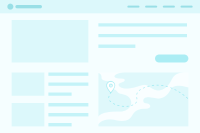

In [13]:
target = GIS(profile="another_online_profile")
cloned_exp = portal_exp.clone(
    target = target, 
    owner = "another_online_user",
    search_existing_items = False,
)
cloned_exp

Now, we can call `view()` on it to ensure that it cloned properly. The difference between `preview()` and `view()` is that `preview()` shows you the Experience draft and any alterations made through the Python API, while `view()` shows the published version of the Experience. Popups may need to be enabled in your browser in order for `preview()` to validate credentials.

In [ ]:
WebExperience(cloned_exp).view()

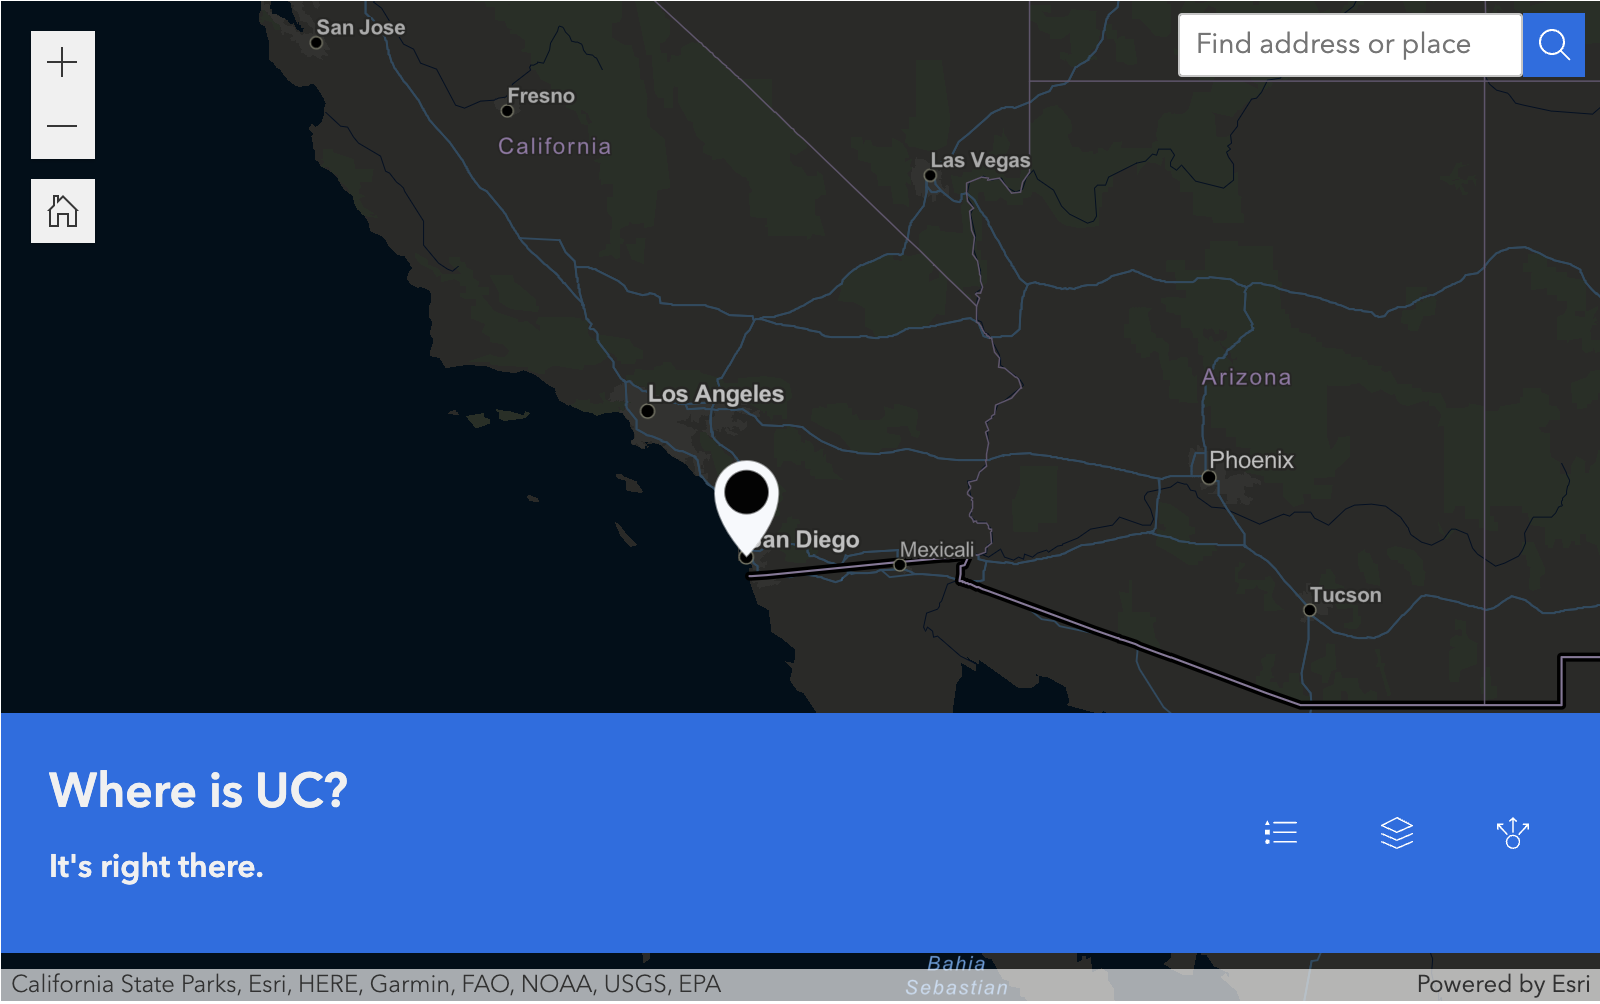 </img> 

## Working with Local Experiences

In addition to portal-based experiences, this class allows users to work with locally-based experiences created via the Developer Edition Experience Builder. In the past, users have expressed their desire to add local Experiences to their portals and remap data with ease, in order to cater to workflows such as moving from staging to production environments or migrating content to new Enterprise versions.

We'll show how to get an experience from the Developer Edition Experience Builder, upload it to different portals, and make sure the dependent data items get remapped accordingly. Instructions downloading and installing the Developer Edition can be found [here](https://developers.arcgis.com/experience-builder/guide/install-guide/).

First, you'll want to download your experience from the homepage of your local Experience Builder app, and then figure out what the path to the `config.json` file is. Once you know this, you can work with it in the ArcGIS API for Python.

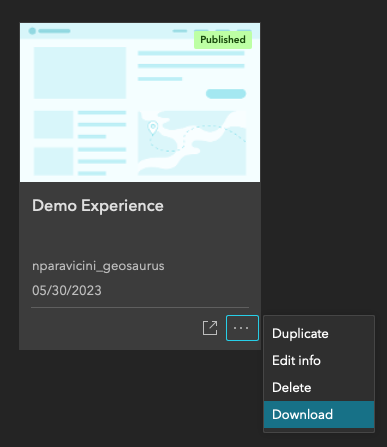 </img> 

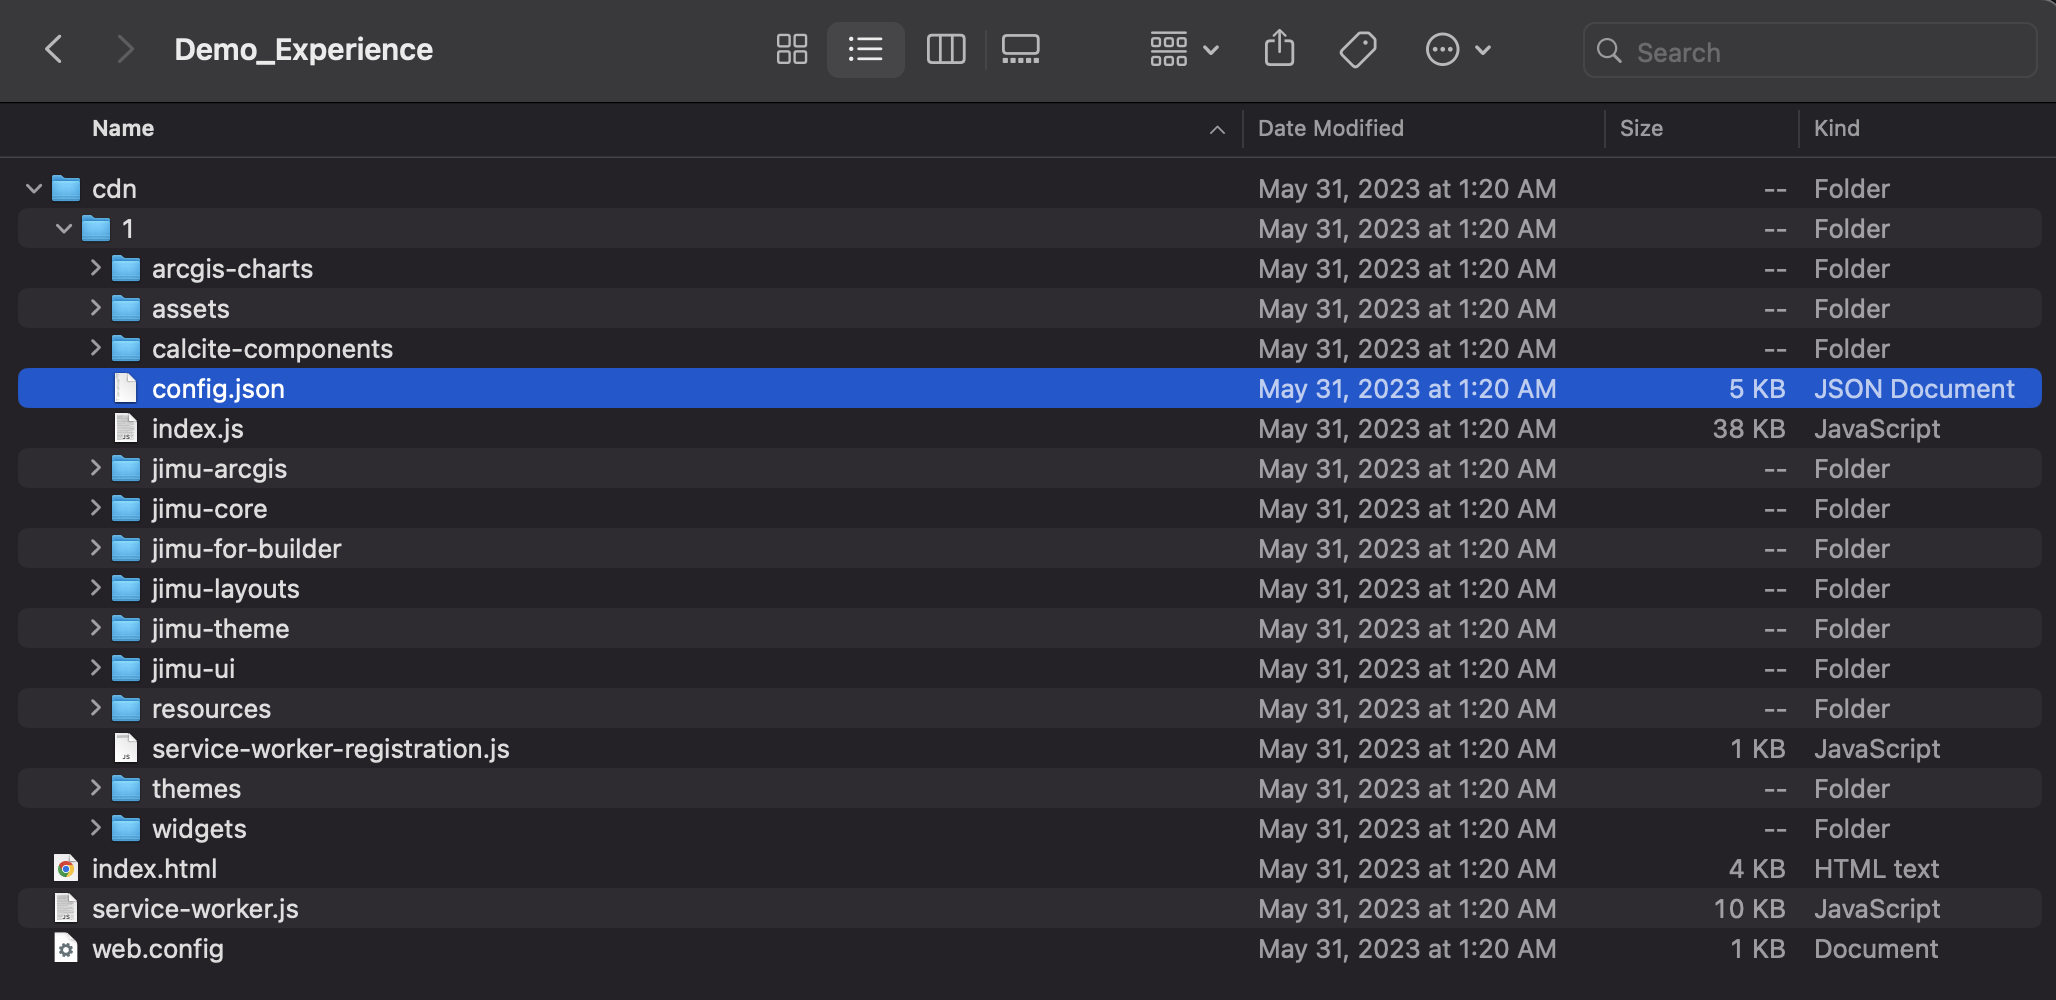 </img> 

In [16]:
# pass in a path to a local config.json when instantiating experience
local_path = '/computer/path/to/config.json'
local_exp = WebExperience(gis = gis, path = local_path)

In [17]:
local_exp.datasources

{'dataSource_1': {'id': 'dataSource_1',
  'type': 'WEB_MAP',
  'sourceLabel': 'UC Location',
  'itemId': '29218750833a43a5844d6686c9f428c5',
  'portalUrl': 'https://geosaurus.maps.arcgis.com'},
 'dataSource_4': {'id': 'dataSource_4',
  'type': 'WEB_MAP',
  'sourceLabel': 'Ugly Map',
  'itemId': '6fdd91f8eb754d01bdbaf4b8b4419719',
  'portalUrl': 'https://geosaurus.maps.arcgis.com'}}

Despite being made locally, these experiences will still have data sources tied to a specific portal. However, what if we want to upload them to a different portal? I.e., from a staging to a production environment? Unless we do something about this, we may be forced to log in to the source portal to view things in any other portal.

Luckily, the `upload()` function has a few options to make sure that the data sources get remapped properly. Let's have a look.

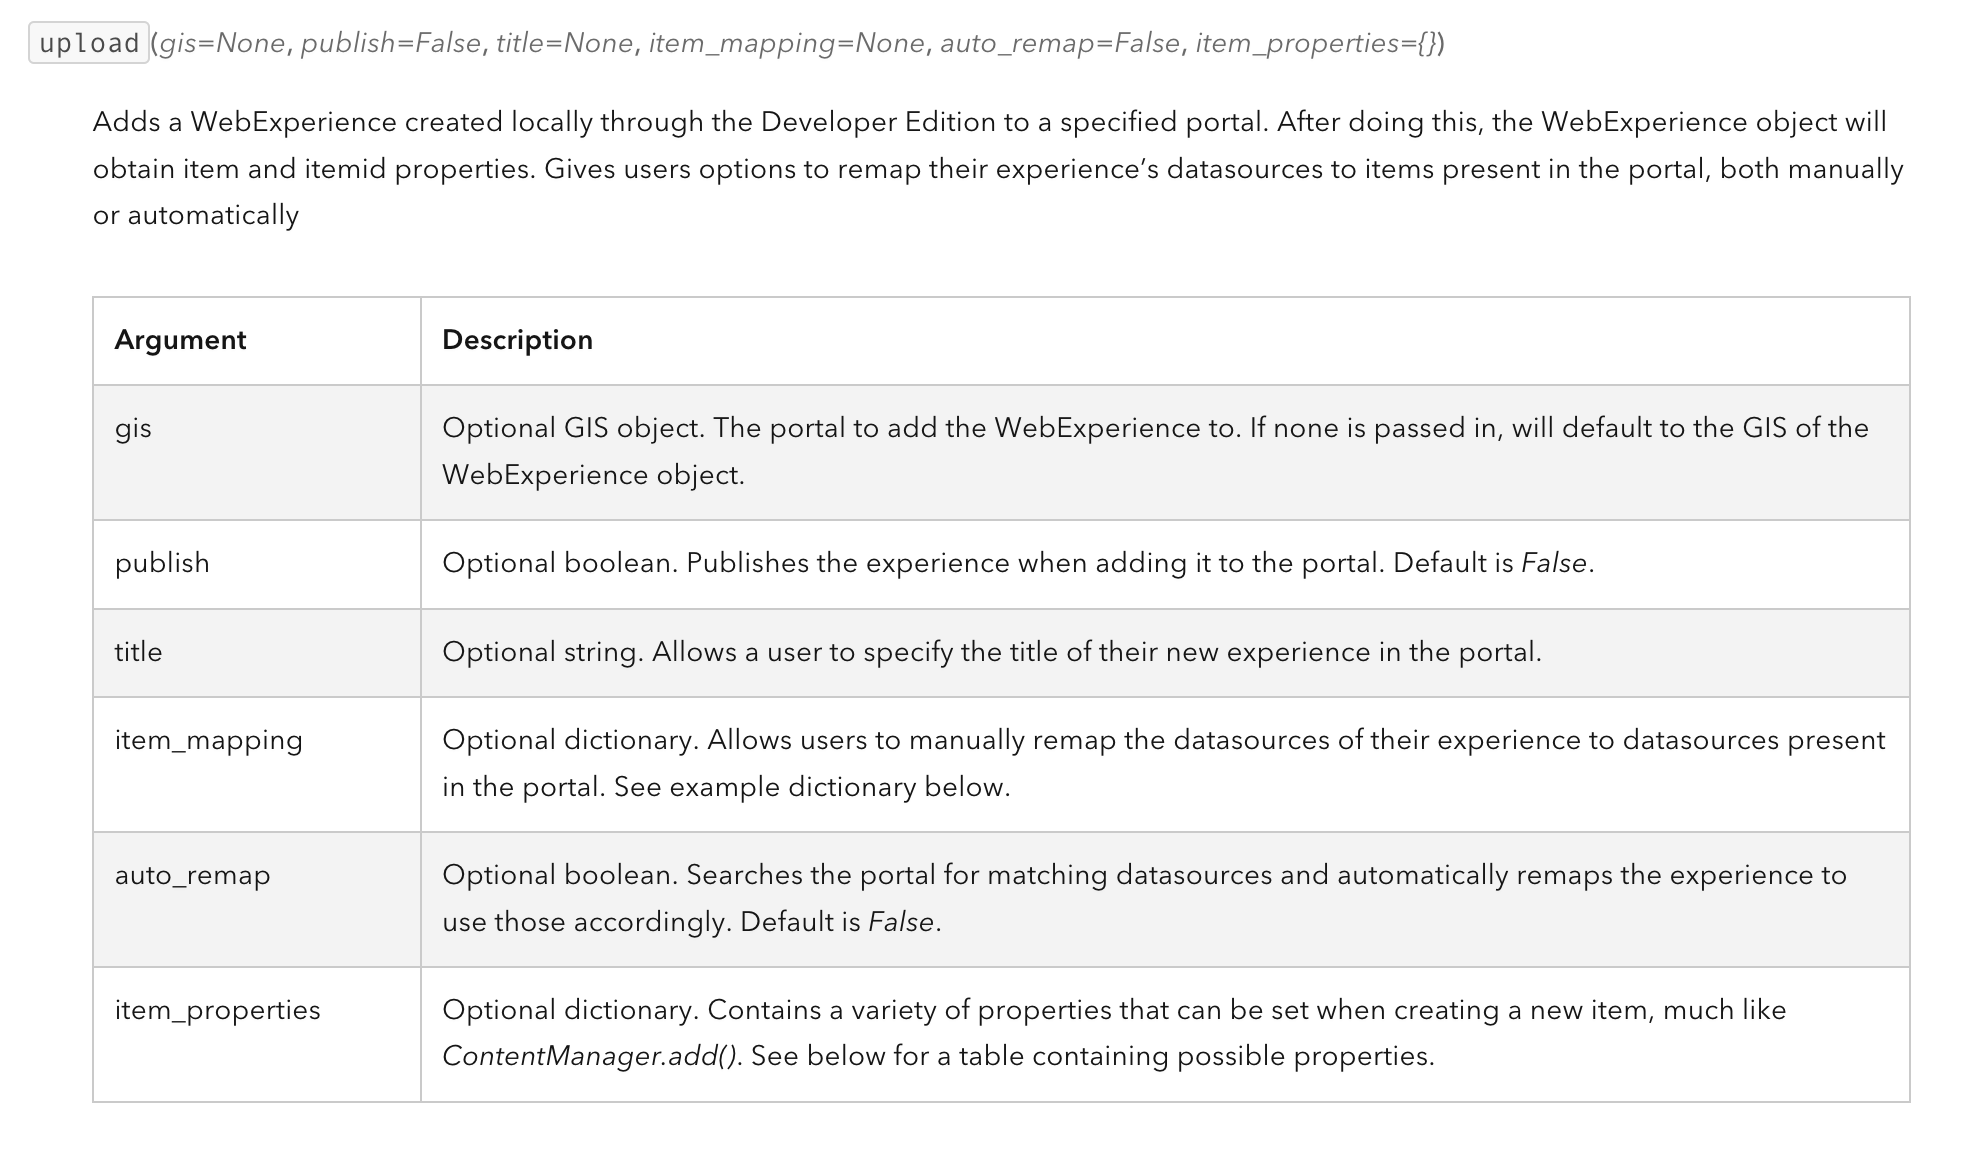 </img> 

This function gives users two options for remapping to data sources in a different portal: the `item_mapping` parameter, and the `auto_remap` parameter. 

`item_mapping` allows users to manually dictate the data sources, and it's modeled off of `WebExperience.datasources`. A user simply creates a dictionary of the same model, but only includes the values they want to change. See below for an example of how we'd change one of our data sources.

In [18]:
item_mapping = {
    "dataSource_4": 
    {
        "itemId" : 'f9827ea6779440d196806b84017f0c33',
        "portalUrl" : target.url,
    }
}

`auto_remap`, on the other hand, does some things behind the scenes when set to `True`. It first will check if each data source is retrievable in the target GIS (some may be if they're Living Atlas or public items). If they're not, then the function searches for an item in the target GIS with a matching name and data type, and will automatically remap to that one. 

These two can be used in tandem as well; `item_mapping` can be used to cover for any data source that won't be automatically remapped. We'll take a look at some examples here.

In [19]:
new_item = local_exp.upload(
    gis = target,
    publish = True,
    title = "Uploaded Local Experience",
    item_mapping = item_mapping,
    auto_remap = True,
)
new_item

<Item title:"Uploaded Local Experience" type:Web Experience owner:another_online_user>

In [ ]:
uploaded_exp = WebExperience(new_item)
uploaded_exp.view()

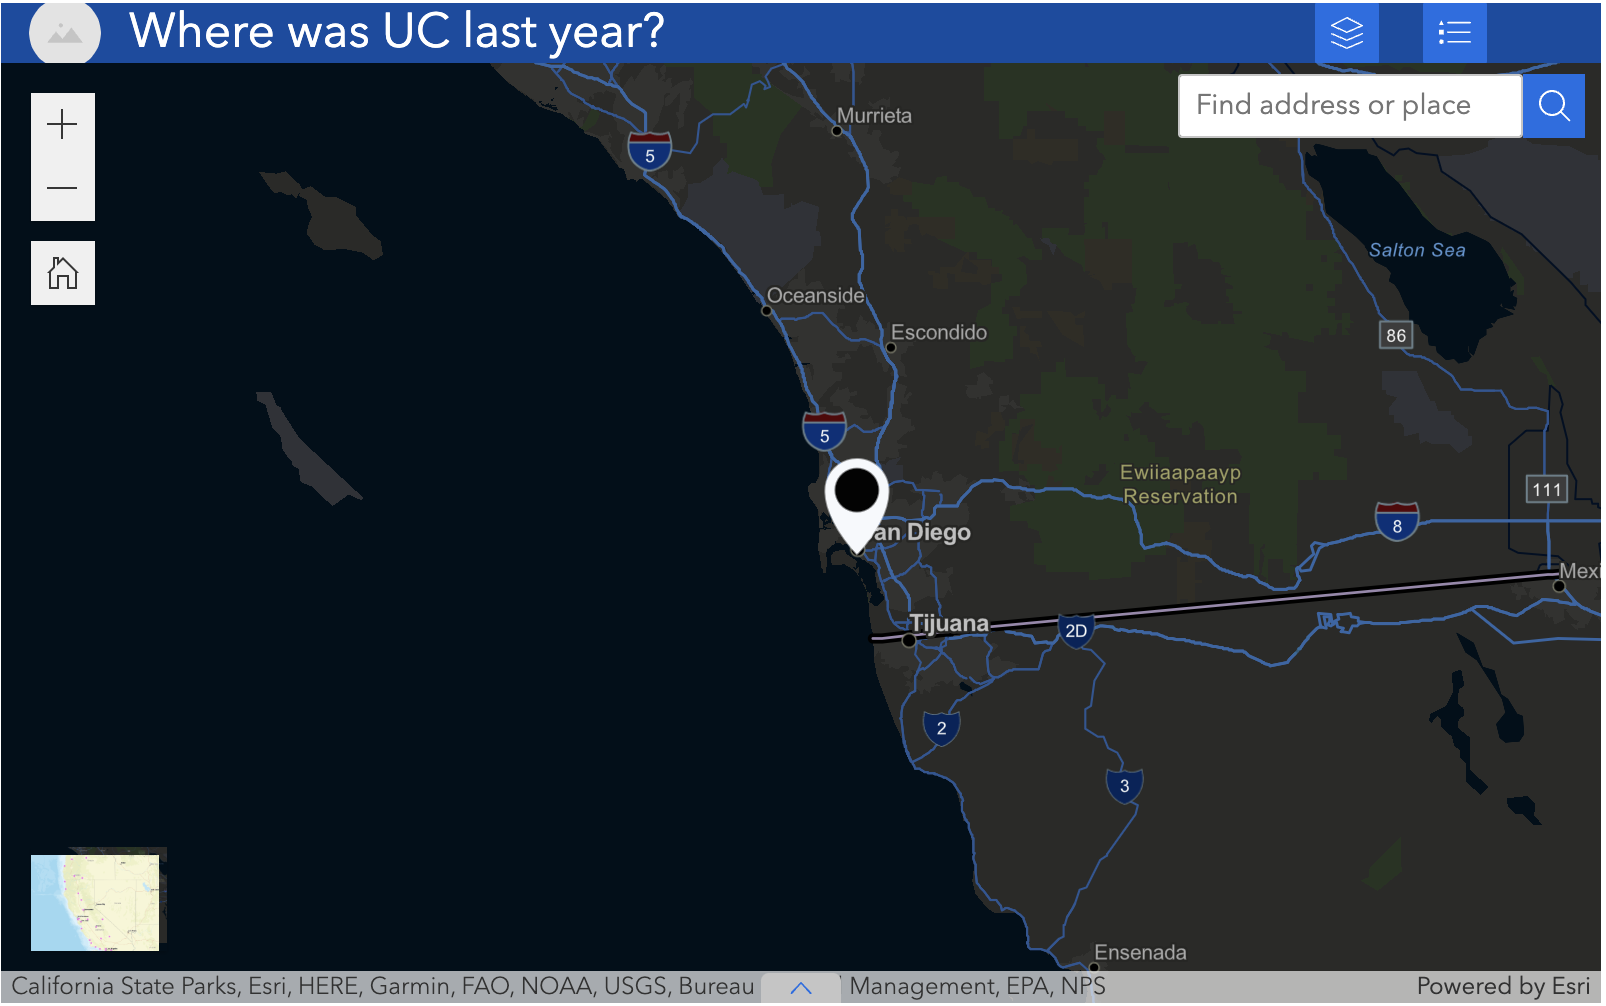 </img>

In [21]:
uploaded_exp.datasources

{'dataSource_1': {'id': 'dataSource_1',
  'type': 'WEB_MAP',
  'sourceLabel': 'UC Location',
  'itemId': '813da9d7790e457b846019c0027c616b',
  'portalUrl': 'https://pythonapi.maps.arcgis.com'},
 'dataSource_4': {'id': 'dataSource_4',
  'type': 'WEB_MAP',
  'sourceLabel': 'Ugly Map',
  'itemId': 'f9827ea6779440d196806b84017f0c33',
  'portalUrl': 'https://pythonapi.maps.arcgis.com'}}

As you can see, we can check instantly that our Experience is viewable in the new target GIS, and that the data sources were properly remapped. `dataSource_1` was remapped through `auto_remap`, and `dataSource_4` had its `itemId` and `portalUrl` values changed by `item_mapping`.